In [49]:
import pandas as pd

dados = pd.read_csv('/content/dados.csv')
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Mailed check,83.9,267.40,2.80


In [50]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

#🛠️ Preparação dos Dados

In [51]:
dados.drop(['customerID',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaymentMethod'], axis=1, inplace=True)

In [52]:
dados['customer.gender'] = dados['customer.gender'].map({'Female': 1, 'Male': 0})

In [53]:
total_clientes = len(dados)
clientes_evadiram = dados['Churn'].sum()
clientes_ativos = total_clientes - clientes_evadiram

prop_evadiram = clientes_evadiram / total_clientes
prop_ativos = clientes_ativos / total_clientes

print(f"Clientes evadiram: {clientes_evadiram} ({prop_evadiram:.2%})")
print(f"Clientes ativos: {clientes_ativos} ({prop_ativos:.2%})")

Clientes evadiram: 1869 (26.54%)
Clientes ativos: 5174 (73.46%)


#🎯 Correlação e Seleção de Variáveis

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

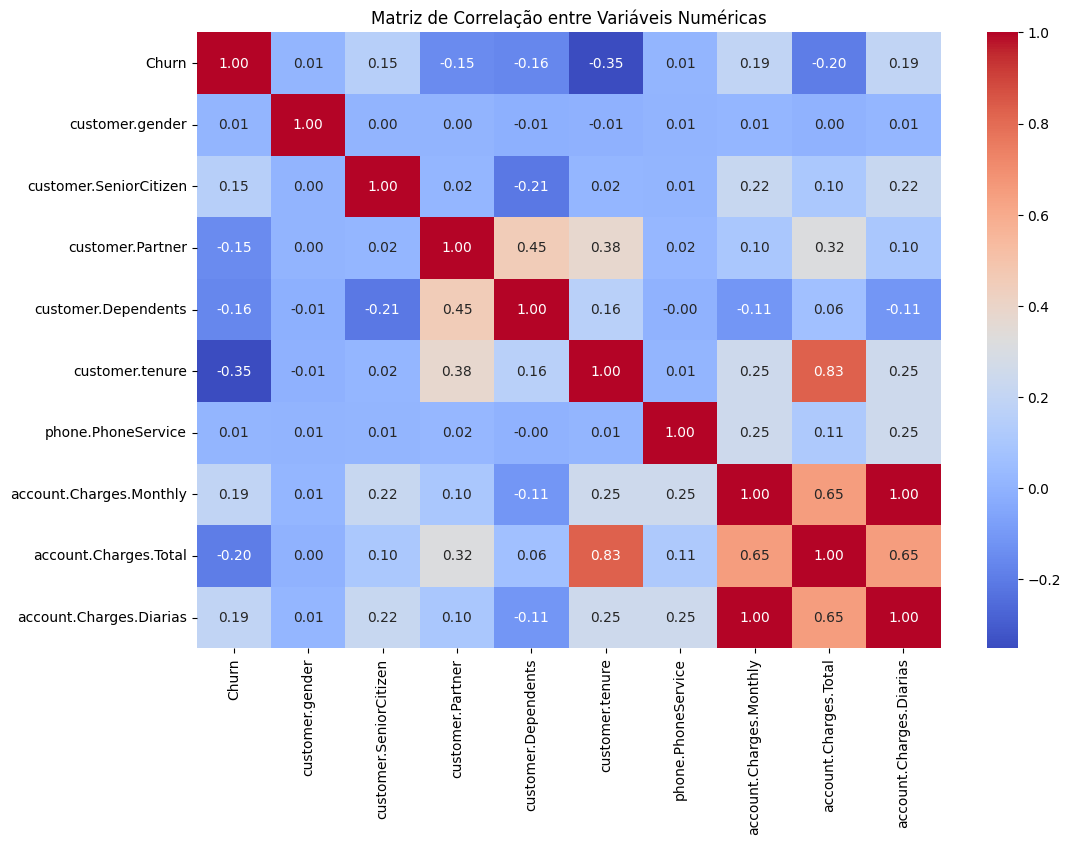

In [55]:
numericas = dados.select_dtypes(include=['int64', 'float64'])

corr = numericas.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

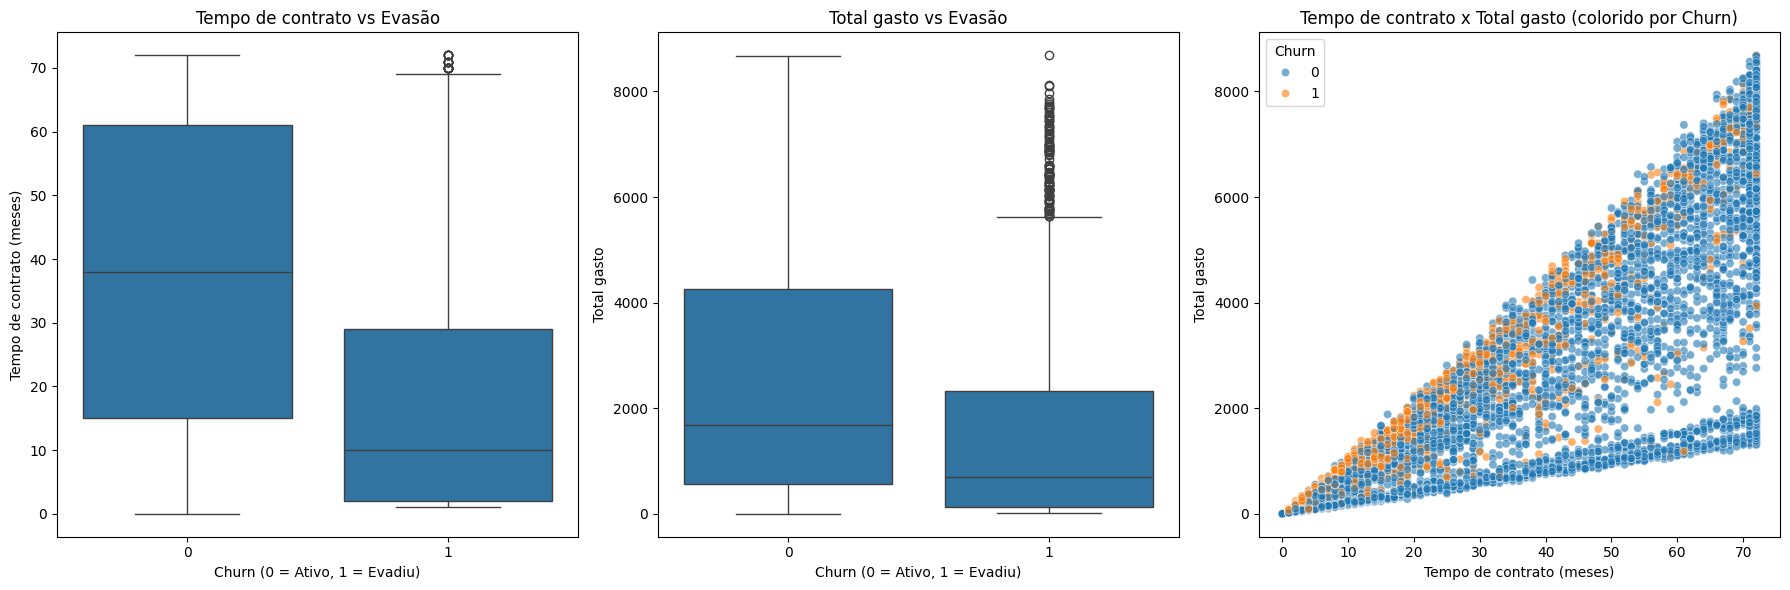

In [56]:
plt.figure(figsize=(18,6))

# 1️ Boxplot: Tempo de contrato x Churn
plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='customer.tenure', data=dados)
plt.title('Tempo de contrato vs Evasão')
plt.xlabel('Churn (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Tempo de contrato (meses)')

# 2️ Boxplot: Total gasto x Churn
plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='account.Charges.Total', data=dados)
plt.title('Total gasto vs Evasão')
plt.xlabel('Churn (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Total gasto')

# 3️ Scatter plot: Tempo de contrato x Total gasto
plt.subplot(1, 3, 3)
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=dados, alpha=0.6)
plt.title('Tempo de contrato x Total gasto (colorido por Churn)')
plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Total gasto')

plt.tight_layout()
plt.show()

#🤖 Modelagem Preditiva

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = dados.drop('Churn', axis=1)
y = dados['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Tamanho do treino: {X_train.shape[0]} amostras")
print(f"Tamanho do teste: {X_test.shape[0]} amostras")

Tamanho do treino: 4930 amostras
Tamanho do teste: 2113 amostras


Modelo 1: Regressão Logística (com normalização)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

modelo_log = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

modelo_log.fit(X_train, y_train)
y_pred_log = modelo_log.predict(X_test)

Modelo 2: Random Forest (sem normalização)

In [60]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42, n_estimators=100)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

Modelo 3: àrvore de Decisão

In [61]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_tree.fit(X_train, y_train)
y_pred_tree = modelo_tree.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

modelos = {
    'Regressão Logística': (modelo_log, y_pred_log),
    'Random Forest': (modelo_rf, y_pred_rf),
    'Árvore de Decisão': (modelo_tree, y_pred_tree)
}

for nome, (modelo, y_pred) in modelos.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Modelo: {nome}")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de Confusão:")
    print(cm)
    print("-"*40)

Modelo: Regressão Logística
Acurácia: 0.7913
Precisão: 0.6389
Recall: 0.4920
F1-score: 0.5559
Matriz de Confusão:
[[1396  156]
 [ 285  276]]
----------------------------------------
Modelo: Random Forest
Acurácia: 0.7752
Precisão: 0.5951
Recall: 0.4795
F1-score: 0.5311
Matriz de Confusão:
[[1369  183]
 [ 292  269]]
----------------------------------------
Modelo: Árvore de Decisão
Acurácia: 0.7231
Precisão: 0.4789
Recall: 0.4866
F1-score: 0.4828
Matriz de Confusão:
[[1255  297]
 [ 288  273]]
----------------------------------------


#📋  Interpretação e Conclusões

# **Análise Crítica dos Modelos de Previsão de Evasão de Clientes**

Com base nos resultados obtidos, é possível fazer a seguinte análise crítica sobre os modelos testados para prever a evasão de clientes.

## **Regressão Logística**

A **Regressão Logística** apresentou o melhor desempenho geral, com maior acurácia (0,7913) e F1-score (0,5559). Apesar disso, seu recall foi relativamente baixo (0,4920), indicando que uma parte dos clientes que evadiram não foi corretamente identificada pelo modelo. Isso sugere que, embora o modelo consiga classificar corretamente a maioria dos clientes, ele ainda perde alguns casos da classe minoritária, que é crucial em problemas de churn.

## **Random Forest**

O **Random Forest** teve desempenho próximo ao da Regressão Logística, com acurácia de 0,7752 e F1-score de 0,5311. Ele é capaz de capturar relações mais complexas entre as variáveis e não é sensível à escala dos dados. No entanto, seu recall também ficou baixo (0,4795), mostrando que ainda há dificuldade em identificar todos os clientes que evadiram.

##**Árvore de Decisão**

A **Árvore de Decisão** isolada apresentou o pior desempenho, com acurácia de 0,7231 e F1-score de 0,4828. Esse modelo tende a sofrer de **overfitting**, aprendendo padrões específicos dos dados de treino que não se generalizam bem para o conjunto de teste. Isso é evidenciado pela menor acurácia e estabilidade inferior nas métricas de precisão e recall.

## **Ajustes Recomendados**

- **Árvore de Decisão**: limitar a profundidade máxima (`max_depth`) ou aumentar o número mínimo de amostras por folha (`min_samples_leaf`) para reduzir overfitting.  
- **Random Forest**: aumentar o número de árvores (`n_estimators`) ou ajustar `max_features` para melhorar a generalização.  
- **Regressão Logística**: ajustar a regularização ou incluir transformações/interações entre variáveis para capturar padrões mais complexos e melhorar o recall.

## **Conclusão**

A Regressão Logística se mostrou o modelo mais equilibrado para essa base de dados, mas ainda apresenta limitações na detecção de clientes que evadiram. O Random Forest também é uma boa opção robusta, enquanto a Árvore de Decisão isolada precisa de ajustes para evitar overfitting. Estratégias adicionais, como balanceamento das classes (oversampling ou SMOTE), podem ajudar a melhorar a identificação da classe minoritária.
